In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

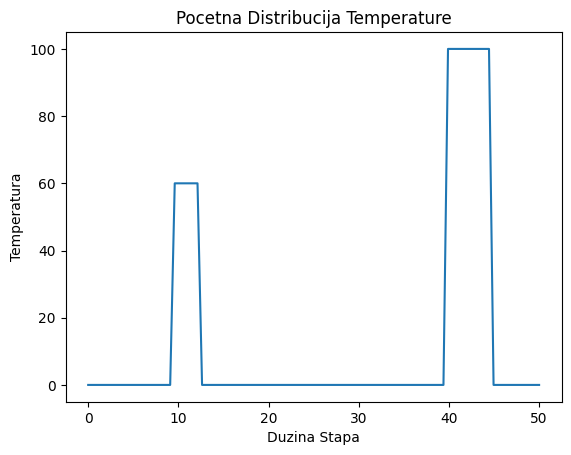

In [2]:
# Konstante
L = 50.0  # Duzina stapa
T = 5.0  # Ukupno vreme
alpha = 2.00  # termalna difuzivnost

nx = 100  
nt = 1000 
dx = L / (nx - 1)
dt = T / nt

# Pocetni uslov
u = np.zeros(nx)

# Inicijalni skok temperature
u[int(40.0 / dx):int(45.0 / dx)] = 100.0  
u[int(10.0 / dx):int(13.0 / dx)] = 60.0

# Granicni uslovi
u[0] = 0.0
u[-1] = 0.0

plt.plot(np.linspace(0, L, nx), u)
plt.title('Pocetna Distribucija Temperature')
plt.xlabel('Duzina Stapa')
plt.ylabel('Temperatura')
plt.show()


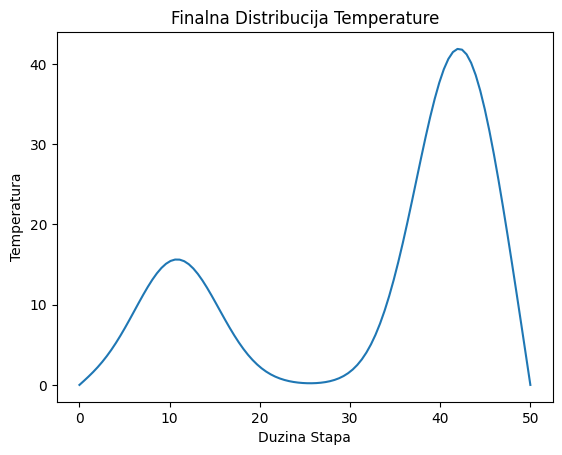

In [3]:
for n in range(nt):
    for i in range(1, nx - 1):
        u[i] = u[i] + alpha * dt / dx**2 * (u[i + 1] - 2 * u[i] + u[i - 1])

# Vizuelizacija finalne distribucije temperature
plt.plot(np.linspace(0, L, nx), u)
plt.title('Finalna Distribucija Temperature')
plt.xlabel('Duzina Stapa')
plt.ylabel('Temperatura')
plt.show()


<module 'matplotlib.pyplot' from '/home/bole/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

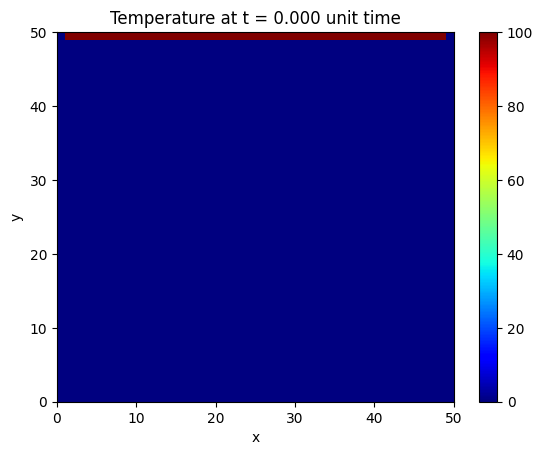

In [4]:
plate_length = 50
max_iter = 100
nt = 50

alpha = 2
dx = plate_length/nt #dx=dy
dt = (dx ** 2)/(4 * alpha)
gamma = (alpha * dt) / (dx ** 2)

T = np.empty((max_iter, nt, nt))

# Pocetni uslov
T_0 = 0

# Granicni uslovi
T_top = 100.0     #T_i_Ly
T_left = 0.0      #T_0_j
T_bottom = 0.0    #T_i_0
T_right = 0.0     #T_Lx_j

# Postavljanje pocetnog uslova
T.fill(T_0)

# Postavljanje granicnih uslova
T[:, (plate_length-1):, :] = T_top
T[:, :, :1] = T_left
T[:, :1, 1:] = T_bottom
T[:, :, (plate_length-1):] = T_right

def calculate_2d(T):
    for k in range(max_iter-1):
        for i in range(1,nt-1,1):
            for j in range(1,nt-1,1):
                T[k + 1, i, j] = gamma * (T[k][i+1][j] + T[k][i-1][j] + T[k][i][j+1] + T[k][i][j-1] - 4*T[k][i][j]) + T[k][i][j]

    return T

def calculate_2d_with_adding_heat(T):
    for k in range(max_iter-1):
        if k < max_iter/2:
            T[k,20:30,20:30] = T[k,20:30,20:30] * 1.05
        for i in range(1,nt-1,1):
            for j in range(1,nt-1,1):
                T[k + 1, i, j] = gamma * (T[k][i+1][j] + T[k][i-1][j] + T[k][i][j+1] + T[k][i][j-1] - 4*T[k][i][j]) + T[k][i][j]

    return T

def plotheatmap_2d(T, k):
    plt.clf()

    plt.title(f"Temperature at t = {k*dt:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.pcolormesh(T, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt

T = calculate_2d(T)

def animate_2d(k):
    plotheatmap_2d(T[k], k)

plotheatmap_2d(T[0],0)

MovieWriter ffmpeg unavailable; using Pillow instead.


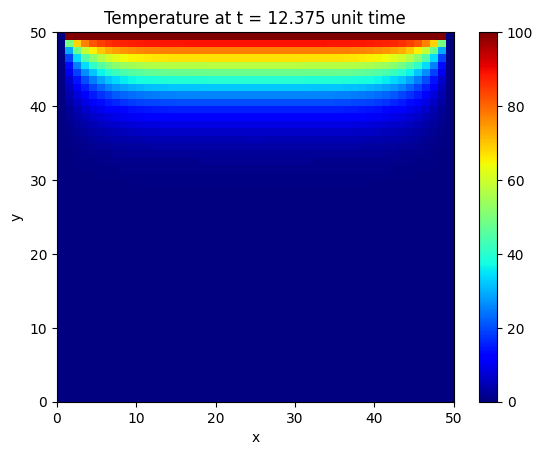

In [5]:
FuncAnimation(plt.figure(), animate_2d, interval=1, frames=max_iter, repeat=False).save("jednacina_provodjenja_toplote_u_2d_1.gif")

<module 'matplotlib.pyplot' from '/home/bole/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

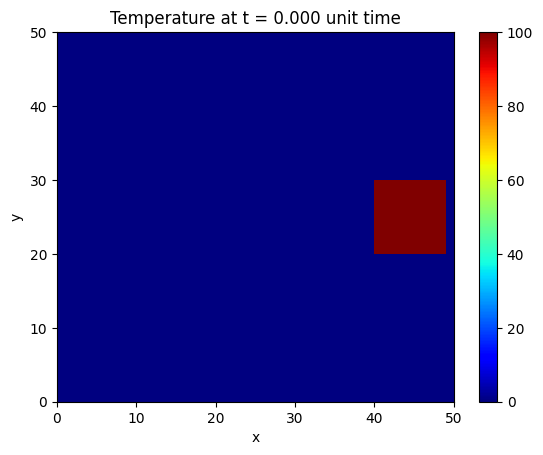

In [6]:
T.fill(T_0)
T[0,20:30,40:49]=100.0
T = calculate_2d(T)
plotheatmap_2d(T[0],0)

MovieWriter ffmpeg unavailable; using Pillow instead.


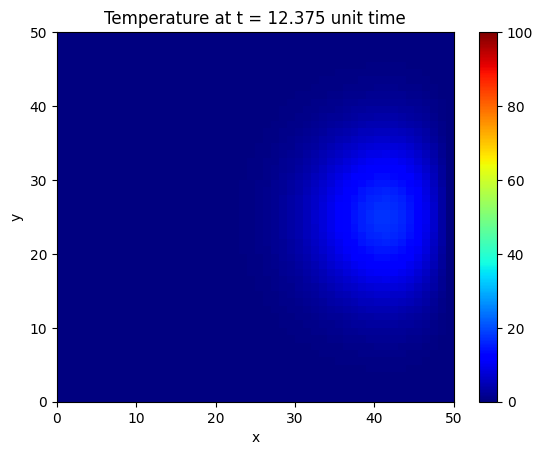

In [7]:
FuncAnimation(plt.figure(), animate_2d, interval=1, frames=max_iter, repeat=False).save("jednacina_provodjenja_toplote_u_2d_2.gif")

<module 'matplotlib.pyplot' from '/home/bole/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

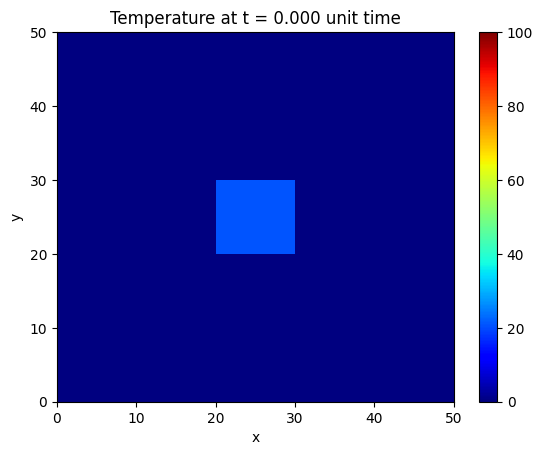

In [8]:
T.fill(T_0)
T[0,20:30,20:30]=20.0
T = calculate_2d_with_adding_heat(T)
plotheatmap_2d(T[0],0)

MovieWriter ffmpeg unavailable; using Pillow instead.


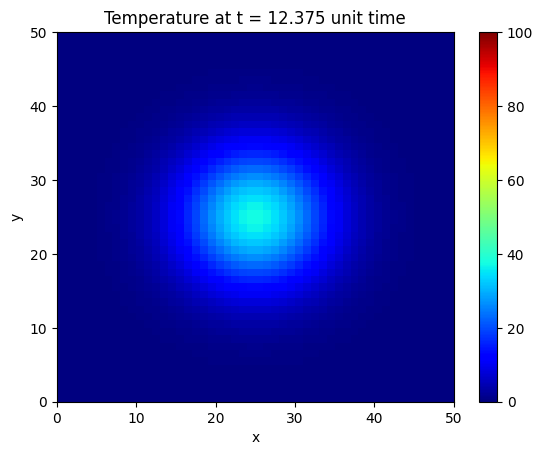

In [9]:
FuncAnimation(plt.figure(), animate_2d, interval=1, frames=max_iter, repeat=False).save("jednacina_provodjenja_toplote_u_2d_3.gif")